In [11]:
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [ ]:
with zipfile.ZipFile('./SMILEs.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
base_dir = 'SMILEs'
test_dir = 'test_images'
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Eliminar la carpeta __MACOSX si existe
macosx_dir = '__MACOSX'
if os.path.exists(macosx_dir):
    shutil.rmtree(macosx_dir)
    print("Carpeta __MACOSX eliminada")

Carpeta __MACOSX eliminada


In [ ]:
set_training = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.


In [ ]:
set_validation = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 2633 files for validation.


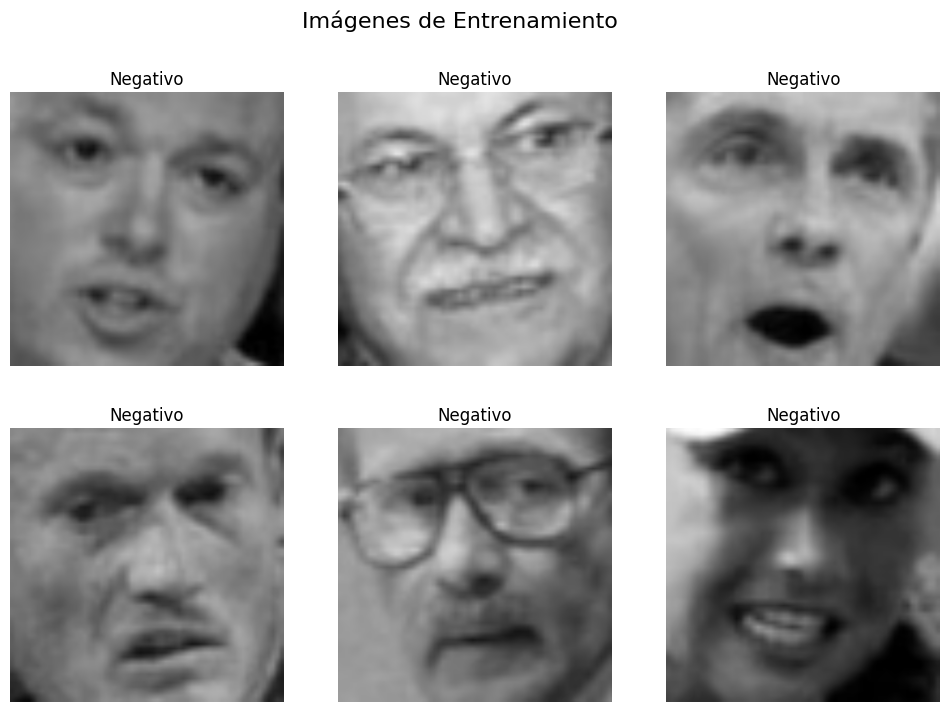

In [ ]:
plt.figure(figsize=(12, 8))
plt.suptitle("Imágenes de Entrenamiento", size=16)
for images, labels in set_training.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Positivo' if labels[i] == 1 else 'Negativo')
        plt.axis('off')
plt.show()

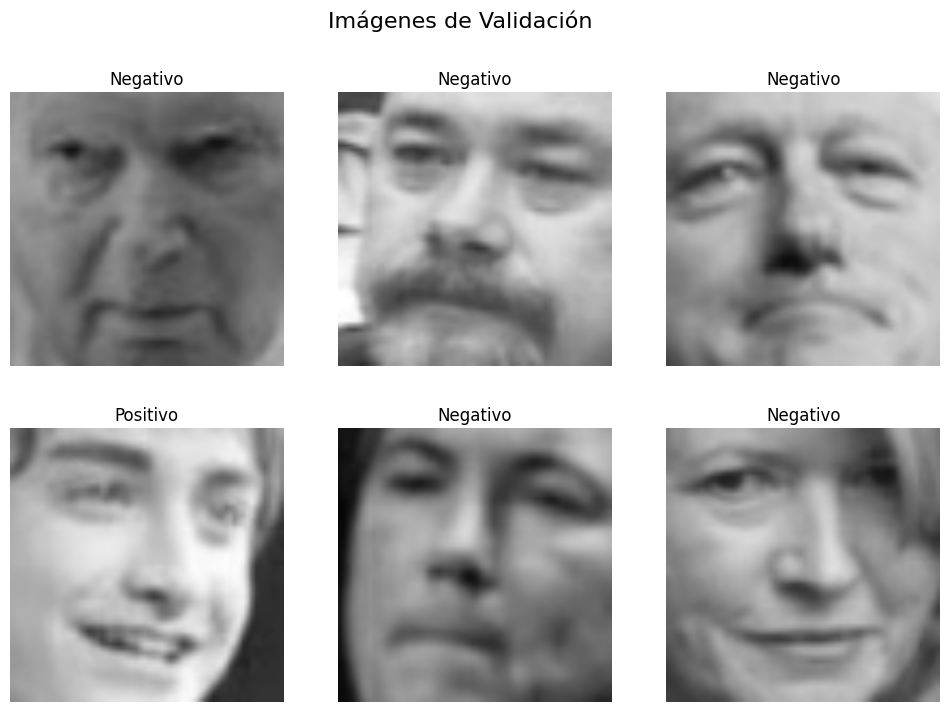

In [ ]:
plt.figure(figsize=(12, 8))
plt.suptitle("Imágenes de Validación", size=16)
for images, labels in set_validation.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Positivo' if labels[i] == 1 else 'Negativo')
        plt.axis('off')
plt.show()

## EJERCICIO

In [20]:

import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [ ]:
with zipfile.ZipFile('SMILEs.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [13]:
macosx_dir = '__MACOSX'
if os.path.exists(macosx_dir):
    shutil.rmtree(macosx_dir)
    print("MacOSX directory removed")

In [14]:
base_dir = 'SMILEs'
test_dir = 'test_images'
os.makedirs(test_dir, exist_ok=True)

In [15]:
for label in ['positives7', 'negatives7']:
    src_dir = os.path.join(base_dir, label)
    files = os.listdir(src_dir)[:3]  # Take first 3 images
    for file in files:
        shutil.copy2(
            os.path.join(src_dir, file),
            os.path.join(test_dir, f"{label}_{file}")
        )

In [16]:
train_ds = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.


In [17]:
val_ds = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 2633 files for validation.


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3), padding='same'),  # Cambiar a 300x300
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 122s 290ms/step - accuracy: 0.7328 - loss: 0.6361 - val_accuracy: 0.7797 - val_loss: 0.6788
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 102s 238ms/step - accuracy: 0.8433 - loss: 0.3657 - val_accuracy: 0.8428 - val_loss: 0.4395
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 81s 246ms/step - accuracy: 0.8832 - loss: 0.2921 - val_accuracy: 0.8553 - val_loss: 0.6033
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 84s 255ms/step - accuracy: 0.9129 - loss: 0.2282 - val_accuracy: 0.7987 - val_loss: 0.5272
Epoch 5/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 138s 242ms/step - accuracy: 0.9239 - loss: 0.1959 - val_accuracy: 0.8599 - val_loss: 0.6683
Epoch 6/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 84s 248ms/step - accuracy: 0.9343 - loss: 0.1680 - val_accuracy: 0.8534 - val_loss: 1.1992
Epoch 7/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.9411 - loss: 0.1483 - val_accuracy: 0.6141 - val_loss: 5.8118
Epoch 8/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 85s 257ms/step - accuracy: 0.9241 - loss

In [24]:
os.getcwd()

'/content'

In [25]:
test_ds = image_dataset_from_directory(
    "/content/test_images",
    image_size=(300, 300),
    batch_size=6,
    shuffle=False
)

Found 6 files belonging to 2 classes.


In [26]:
test_images = next(iter(test_ds))[0]
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


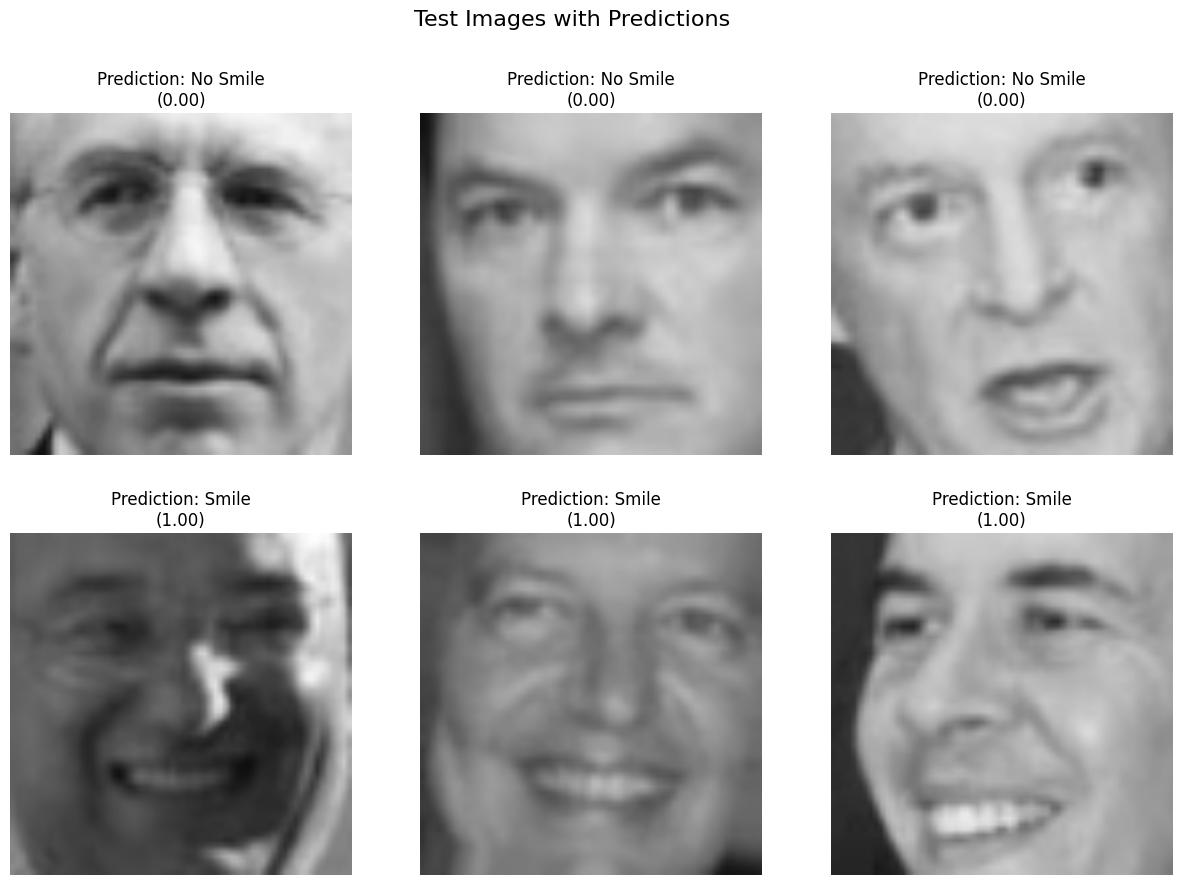

In [27]:
plt.figure(figsize=(15, 10))
plt.suptitle("Test Images with Predictions", size=16)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    pred = predictions[i][0]
    plt.title(f'Prediction: {"Smile" if pred > 0.5 else "No Smile"}\n({pred:.2f})')
    plt.axis('off')
plt.show()